### Dataset

This project uses the Data science books dataset available on Kaggle https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books.

### To-dos:

- [ ] EDA: Do more expensive books have better reviews?

- [ ] EDA: Do longer books have higher prices?

- [ ] What are the best Python books? What are the best ML books?

- [ ] Cluster analysis of book names / TF-IDF and K-means

- [ ] Amazon review scraping & Book review summary

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/work/final_book_dataset_kaggle 2.csv')
df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


## Exploratory analysis on Data Science books

### 💰 Price vs. reviews

In [34]:
px.scatter(df, x="price", y="avg_reviews",size="n_reviews")

### 📚 Best Python books

In [4]:
# Select books based on title containing "Python"
python_books = df[df['title'].str.contains("Python")]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews','avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


### 🤖 Best Machine learning books

In [5]:
# Select books based on title containing "Python"
python_books = df[df['title'].str.contains("Machine Learning")]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews','avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


## 🧐 Clustering book titles

💡 What are the main types of Data Science books?

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df["title"])

In [7]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=600, n_init=10)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

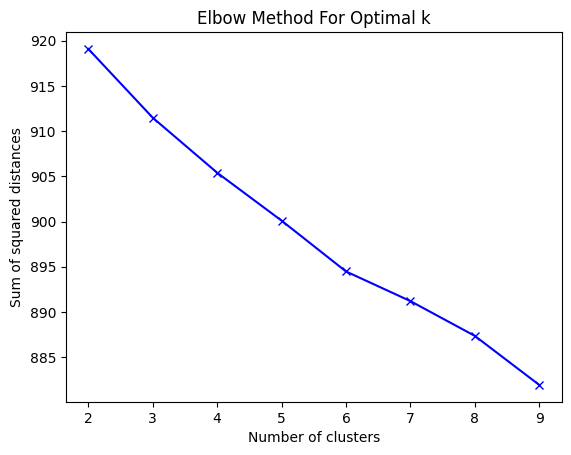

In [9]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# Get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
472  Deep Discourse: A Framework for Cultivating St...        0
782  Digital Forensics and Incident Response: Incid...        0
781  IoT and Edge Computing for Architects: Impleme...        0
775   Programming ArcGIS Pro with Python (2nd Edition)        0
767  The Pythonic Way: An Architectâ€™s Guide to Co...        0
..                                                 ...      ...
34   Modern Data Science with R (Chapman & Hall/CRC...        5
308  Statistical Rethinking: A Bayesian Course with...        5
289  Analysis of Categorical Data with R (Chapman &...        5
63   Introduction to Data Science: Data Analysis an...        5
364  Applied Survey Data Analysis (Chapman & Hall/C...        5

[946 rows x 2 columns]


In [11]:
!pip install wordcloud==1.8.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 27.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


### Creating wordclouds for clusters

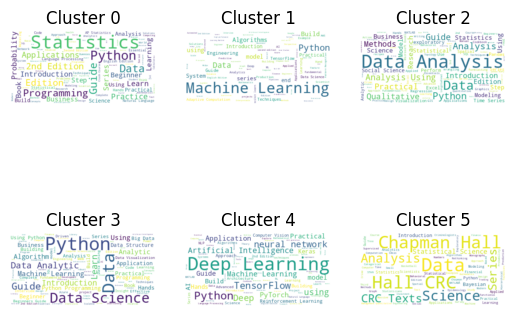

In [12]:
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

In [13]:
cluster_num = '0'

In [14]:
# Books in clusters
book_cl[book_cl.cluster == int(cluster_num)]

,title,cluster
6,Practical Statistics for Data Scientists: 50+ ...,0
19,The Art of Statistics: How to Learn from Data,0
38,Naked Statistics: Stripping the Dread from the...,0
43,Microsoft Power BI Quick Start Guide: Bring yo...,0
76,MLOps Engineering at Scale,0
...,...,...
941,The Book of R: A First Course in Programming a...,0
942,Basic Business Statistics: A Casebook (Textboo...,0
943,Elementary Statistics: Picturing the World,0
944,Making Sense of Statistics: A Conceptual Overview,0


In [15]:
# Prediction on unseen data
test = vectorizer.transform(['tensorflow Deep learning'])
model.predict(test)[0]

4

### 🌐 Scraping Amazon Book reviews

In [16]:
# Example urls
product_url = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/dp/1119741742/"
reviews_url  = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/product-reviews/1119741742/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"


In [17]:
def get_review_url(product_url):
    try:
        split_url = product_url.split('dp')
        product_number = split_url[1].split('/')[1]
        review_url = split_url[0] + 'product-reviews/' + product_number + "/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    except:
        review_url = None
    return review_url

In [18]:
# Create review urls for each book in dataset
df['review_urls'] = df['complete_link'].apply(lambda x: get_review_url(x))

# Remove empty review urls and create a new dataset
df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [19]:
df_reviews

,index,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,review_urls
0,0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...,https://www.amazon.com/Ace-Data-Science-Interv...
2,2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...,https://www.amazon.com/Fundamentals-Data-Engin...
3,3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...,https://www.amazon.com/Essential-Math-Data-Sci...
4,4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,940,5 Steps to a 5: AP Statistics 2023 Elite Stude...,"[Jared Derksen,DeAnna Krause McDonald]",28.00,NaN,NaN,0,0.00,0.00,0.00,0.00,0.00,8.4 x 1.3 x 10.7 inches,2 pounds,English,McGraw Hill; 1st edition (August 23 2022),978-1264500338,/Steps-Statistics-2023-Elite-Student/dp/126450...,https://www.amazon.com/Steps-Statistics-2023-E...,https://www.amazon.com/Steps-Statistics-2023-E...
779,941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...,https://www.amazon.com/Book-First-Course-Progr...
780,943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...,https://www.amazon.com/Elementary-Statistics-P...
781,944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...,https://www.amazon.com/Making-Sense-Statistics...


In [20]:
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
book_titles = df_reviews['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }



if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(f"Processing URL {i + 1}/{len(URLS)}: {URLS[i]}")
        
        try:
            html = get_page_html(URLS[i])
            reviews = get_reviews_from_html(html)
            
            logging.info(f"Number of reviews found: {len(reviews)}")
            
            for rev in reviews:
                data = orchestrate_data_gathering(rev)
                data.update({'title': df_reviews['title'][i]})
                all_results.append(data)
        
        except Exception as e:
            logging.error(f"Error processing URL {URLS[i]}: {str(e)}")
    
    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d')}.csv"
    logging.info(f"Saving to {save_name}")
    
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

INFO:root:Processing URL 286/783: https://www.amazon.com/Analytics-Science-Analysis-Predictive-Business/product-reviews/1530135605/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:Number of reviews found: 0
INFO:root:Processing URL 287/783: https://www.amazon.com/Practical-Data-Analysis-JMP-Third/product-reviews/1642956104/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:Number of reviews found: 0
INFO:root:Processing URL 288/783: https://www.amazon.com/Python-Finance-Mastering-Data-Driven/product-reviews/1492024333/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:Number of reviews found: 0
INFO:root:Processing URL 289/783: https://www.amazon.com/Applied-Spatial-Data-Analysis-Use/product-reviews/1461476178/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:Number of reviews found: 0
INFO:root:Processing URL 290/783: https://www.amazon.com/Hands-Exploratory-Data-Analysis-exploratory/product-reviews/178

In [22]:
out

,review_text,review_stars,title
0,Useful timely book with information on how to ...,5.0 out of 5 stars,Data Mesh in Action
1,"I'm about half way through the book, didn't wa...",5.0 out of 5 stars,The Machine Learning Solutions Architect Handb...
2,What an incredible and practical book! I was a...,5.0 out of 5 stars,The Machine Learning Solutions Architect Handb...
3,Machine learning solutions architect handbook ...,4.0 out of 5 stars,The Machine Learning Solutions Architect Handb...
4,I bought this book to learn what a ML solution...,5.0 out of 5 stars,The Machine Learning Solutions Architect Handb...
...,...,...,...
368,"Good book for those beginners in stats, and a ...",4.0 out of 5 stars,Statistics Made Simple for School Leaders: Dat...
369,Hmmmm! It’s stats,5.0 out of 5 stars,Statistics Made Simple for School Leaders: Dat...
370,Got this for my son for school. Exactly what ...,5.0 out of 5 stars,Probability and Statistical Inference
371,Product as described.,5.0 out of 5 stars,5 Steps to a 5: AP Statistics 2022


In [24]:
book_reviews = pd.read_csv('/work/book_reviews_2024-01-05.csv')

# Aggregate reviews for each book title
book_reviews['review_text'] = book_reviews['review_text'].astype(str)
book_reviews_agg = book_reviews.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
book_reviews_agg

,title,review_text
0,5 Steps to a 5: AP Statistics 2022,Product as described. Needed this for an AP ex...
1,A Gentle Introduction to Stata,Book is for Stats 1 course. To compliment lab ...
2,A Primer on Machine Learning in Subsurface Geo...,This book has so many pictures! And they are i...
3,Analytics Stories: Using Data to Make Good Thi...,I've been an analyst for four years now and I ...
4,Bayesian Modeling and Computation in Python (C...,This is a great book with some minor issues. I...
5,Beginning Anomaly Detection Using Python-Based...,good There are 408 pages but it can be reduced...
6,Black Hat Python 2nd Edition: Python Programmi...,"Black Hat Python, 2nd Edition, is an invaluabl..."
7,Computational Cell Physiology: With Examples I...,I love your book. I and my students learned ma...
8,Data Mesh in Action,Useful timely book with information on how to ...
9,Data Mining for Business Analytics: Concepts T...,There are a lot of good things about this new ...


In [25]:
!pip install bert-extractive-summarizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.9/738.9 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 27.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


### Book reviews summarization

In [32]:
# Summarizing book reviews
from summarizer import Summarizer

bert_model = Summarizer()
bert_summary = ''.join(bert_model(book_reviews_agg.review_text[3], ratio = 0.2))
print(bert_summary)

I've been an analyst for four years now and I wish this book came out when I started. I think this makes the book enjoyable for us data nerds as well as those who aren't. Dr. Winston uses mostly MS Excel to make sense of data, process it, visualize it and communicate it in a compelling way. It also illustrates "the power of two" rule on inventory management. It reminds me the most of Korner's "The Pleasure of Counting" in that each chapter presents a different case/problem/story and outlines the insights and the math used to untangle it. are cited in-paragraph for the reader's benefit. Data scientists, statisticians, analysts, and curious readers will enjoy this book the most. Highly recommended Great:The author covers a wide range of data challenges (61 chapters). In summary, the reader gets a basic idea of applying Benford’s law, but that’s it.


In [31]:
from IPython.display import display, Markdown
display(Markdown(book_reviews_agg.review_text[3]))

I've been an analyst for four years now and I wish this book came out when I started. Many analytics books are all theory and no practice. This book's case studies make concepts easy to grasp. Have read all of this author's books and I think this one my be the best.  Love the diversity of topics from sports to politics to healthcare and more.  I really like the way he tell you the story and then gives you the Excel calculations.  I think this makes the book enjoyable for us data nerds as well as those who aren't. According to Dr. Hal R.Varian, Google’s Chief Economist, "The ability to take data—to be able to understand it, to process it, to extract value from it, to visualize it, to communicate it—that’s going to be a hugely important skill in the next decades." This 2009 quote talks about a skill known as data storytelling.Dr. Winston's "Analytics Stories" does a fantastic job at introducing the reader to data storytelling. He builds over 50 business cases that range from politics to baseball. Dr. Winston uses mostly MS Excel to make sense of data, process it, visualize it and communicate it in a compelling way.For example, chapter 52 applies the Economic Order Quantity (EOQ) model and extends the application to include demand uncertainty and reorder point. It also illustrates "the power of two" rule on inventory management. It sounds quite specialized, and it is, but it is written in a way that is fun to read and very visual. I teach logistics and supply chain management at college level and will use this chapter to teach the EOQ model to my students.On a completely different application, chapter 46 discusses whether roundabouts are a good idea or not. Chapter 41 uses data to talk about the causes of the 1854 London Cholera Outbreak, and so on.Analytics Stories is an outstanding resource for specialists and aficionados of data storytelling! Oh, what good fun this book was! It reminds me the most of Korner's "The Pleasure of Counting" in that each chapter presents a different case/problem/story and outlines the insights and the math used to untangle it. There's a ton of educational value too, aside from the analyses themselves. The topics range from politics, sports, education, policing, divorce, finance, traffic, drafts, etc... Metrics and jargon and clearly explained.It is extremely well documented as well: all sources for articles, texts, data, studies, etc. are cited in-paragraph for the reader's benefit. This alone increased my reading list considerably.The best part of the book is that for most of the chapters, Professor Winston presents a quantitative/statistical analysis of the story using Excel worksheets, which should make it accessible to the non-programming crowd. I myself enjoyed re-doing some of these in Python for some practice and to add reference code to my repos/library.Data scientists, statisticians, analysts, and curious readers will enjoy this book the most.Highest possible recommendation! What's so special about this book is that it's really trying to teach audiences at multiple levels. For beginners / people who have studied it all before (multiple times, for my part! And yet I forget all of the details), basic background statistics info is presented. It's quick, it's something that wouldn't bother those more familiar, but it helps ensure the others are keeping up. Highly recommended Great:The author covers a wide range of data challenges (61 chapters). Obviously, with so many chapters, it’s impossible to deep into any chapter. Some chapters are concise, and I wonder who the target audience is. Is it managers and MBAs?Bad:Chapter 5: How did Bernie Madoff keep his fund going?I wrote my Ph.D. thesis on Benford’s law and work as a Data Scientist (BenfordAnalytics) for a living. In short, the application of Benford’s law is lacking, saying the least. With 214 samples, we can only be 43.3% confident (my calculation) that Madoff cheated. In general, that’s not a high enough confidence level. In general, we aim for 90% or 95%. In summary, the reader gets a basic idea of applying Benford’s law, but that’s it.Don’t get me wrong; it’s an exciting book that tackles many analytics problems. However, the reader has to be aware that he has to dive deeper to apply the technique in the real world in any case.Franco

In [33]:
display(Markdown(bert_summary))

I've been an analyst for four years now and I wish this book came out when I started. I think this makes the book enjoyable for us data nerds as well as those who aren't. Dr. Winston uses mostly MS Excel to make sense of data, process it, visualize it and communicate it in a compelling way. It also illustrates "the power of two" rule on inventory management. It reminds me the most of Korner's "The Pleasure of Counting" in that each chapter presents a different case/problem/story and outlines the insights and the math used to untangle it. are cited in-paragraph for the reader's benefit. Data scientists, statisticians, analysts, and curious readers will enjoy this book the most. Highly recommended Great:The author covers a wide range of data challenges (61 chapters). In summary, the reader gets a basic idea of applying Benford’s law, but that’s it.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0f39e40f-7787-42dc-82ce-3defdbe0bbf3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>